## MODELADO CLASIFICACION NVICTIM_INTERV CON UNDERSAMPLING NEAR_MISS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Carga de los datos ya codificados categóricos

In [2]:
df_premodelo = pd.read_csv('./madrid_accidentes_modelar_NVICTIM_INTERV_v1_0.csv',encoding='latin1')

df_premodelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86817 entries, 0 to 86816
Data columns (total 23 columns):
MAL_TIEMPO                               86817 non-null int64
MAL_ESTADO_SUELO                         86817 non-null int64
num_vehic_implic                         86817 non-null int64
conductor_menor                          86817 non-null int64
conductor_18_34                          86817 non-null int64
conductor_35_49                          86817 non-null int64
conductor_50_mas                         86817 non-null int64
RANGO_HORARIO_DE 00:00 A 7:00            86817 non-null int64
RANGO_HORARIO_DE 12:00 A 17:00           86817 non-null int64
RANGO_HORARIO_DE 17:00 A 21:00           86817 non-null int64
RANGO_HORARIO_DE 21:00 A 00:00           86817 non-null int64
RANGO_HORARIO_DE 7:00 A 12:00            86817 non-null int64
DIA_SEMANA_FIN DE SEMANA                 86817 non-null int64
DIA_SEMANA_LABORABLE                     86817 non-null int64
TIPO_ACCIDENTE_ATROPELL

## SELECCION CARACTERISTICAS

Probaremos ranking importancia características y eliminación recursiva.

In [3]:
X = df_premodelo.drop(columns='NVICTIM_INTERV')

y = df_premodelo['NVICTIM_INTERV']

X.shape

(86817, 22)

### Importancia característica, modelo RF

In [4]:
from sklearn.ensemble import RandomForestClassifier

model_RF_ranking = RandomForestClassifier(n_estimators=500,random_state=42)

model_RF_ranking.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [5]:
ranking_RF = pd.Series(model_RF_ranking.feature_importances_,index=X.columns)

ranking_RF.sort_values(ascending=False)

num_vehic_implic                         0.213344
TIPO_ACCIDENTE_COLISION MULTIPLE         0.119474
conductor_18_34                          0.087695
conductor_35_49                          0.081014
TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS    0.068596
conductor_50_mas                         0.064594
TIPO_ACCIDENTE_COLISION DOBLE            0.052645
RANGO_HORARIO_DE 00:00 A 7:00            0.044811
MAL_ESTADO_SUELO                         0.035470
MAL_TIEMPO                               0.034006
TIPO_ACCIDENTE_ATROPELLO                 0.025405
RANGO_HORARIO_DE 7:00 A 12:00            0.021158
DIA_SEMANA_FIN DE SEMANA                 0.019492
RANGO_HORARIO_DE 12:00 A 17:00           0.018086
DIA_SEMANA_LABORABLE                     0.018073
TIPO_ACCIDENTE_CAIDA BICICLETA           0.017980
RANGO_HORARIO_DE 17:00 A 21:00           0.017827
RANGO_HORARIO_DE 21:00 A 00:00           0.016384
TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO    0.016109
conductor_menor                          0.013364


### RFE  (ELIMINACION RECURSIVA)

In [6]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [7]:

model_RFE = RandomForestClassifier(random_state=42)
rfe = RFE(model_RFE, 18)

fit_RFE = rfe.fit(X, y)


In [8]:
ranking_RFE = pd.Series(X.columns.values, index=fit_RFE.ranking_)

ranking_RFE.sort_index()

1                               MAL_TIEMPO
1           TIPO_ACCIDENTE_CAIDA BICICLETA
1                 TIPO_ACCIDENTE_ATROPELLO
1                     DIA_SEMANA_LABORABLE
1                 DIA_SEMANA_FIN DE SEMANA
1            RANGO_HORARIO_DE 7:00 A 12:00
1         TIPO_ACCIDENTE_COLISION MULTIPLE
1           RANGO_HORARIO_DE 17:00 A 21:00
1           RANGO_HORARIO_DE 12:00 A 17:00
1            RANGO_HORARIO_DE 00:00 A 7:00
1                         conductor_50_mas
1                          conductor_35_49
1                          conductor_18_34
1            TIPO_ACCIDENTE_COLISION DOBLE
1                         num_vehic_implic
1                         MAL_ESTADO_SUELO
1    TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS
1    TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO
2           RANGO_HORARIO_DE 21:00 A 00:00
3                          conductor_menor
4              TIPO_ACCIDENTE_VUELCO_OTROS
5         TIPO_ACCIDENTE_CAIDA VIAJERO BUS
dtype: object

### Tabla resumen seleccion caracteristicas.

In [9]:
tabla_ranking = pd.DataFrame({'RF_importance': ranking_RF.sort_values(ascending=False).index, \
                             'orden_RFE': ranking_RFE.sort_index().index, 'atributo_RFE': ranking_RFE.sort_index().values})

tabla_ranking

,RF_importance,orden_RFE,atributo_RFE
0,num_vehic_implic,1,MAL_TIEMPO
1,TIPO_ACCIDENTE_COLISION MULTIPLE,1,TIPO_ACCIDENTE_CAIDA BICICLETA
2,conductor_18_34,1,TIPO_ACCIDENTE_ATROPELLO
3,conductor_35_49,1,DIA_SEMANA_LABORABLE
4,TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS,1,DIA_SEMANA_FIN DE SEMANA
5,conductor_50_mas,1,RANGO_HORARIO_DE 7:00 A 12:00
6,TIPO_ACCIDENTE_COLISION DOBLE,1,TIPO_ACCIDENTE_COLISION MULTIPLE
7,RANGO_HORARIO_DE 00:00 A 7:00,1,RANGO_HORARIO_DE 17:00 A 21:00
8,MAL_ESTADO_SUELO,1,RANGO_HORARIO_DE 12:00 A 17:00
9,MAL_TIEMPO,1,RANGO_HORARIO_DE 00:00 A 7:00


Nos quedamos con las de RFE

In [10]:
X.drop(columns=['RANGO_HORARIO_DE 21:00 A 00:00','conductor_menor', \
                'TIPO_ACCIDENTE_VUELCO_OTROS','TIPO_ACCIDENTE_CAIDA VIAJERO BUS'], inplace=True)



# 'MAL_ESTADO_SUELO','MAL_TIEMPO', \
# 'conductor_50_mas',
# 'RANGO_HORARIO_DE 7:00 A 12:00','RANGO_HORARIO_DE 12:00 A 17:00','RANGO_HORARIO_DE 17:00 A 21:00',
# 'TIPO_ACCIDENTE_ATROPELLO','TIPO_ACCIDENTE_CAIDA BICICLETA', \'TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO',
# 'DIA_SEMANA_LABORABLE',


X.shape

(86817, 18)

In [11]:
X.columns

Index(['MAL_TIEMPO', 'MAL_ESTADO_SUELO', 'num_vehic_implic', 'conductor_18_34',
       'conductor_35_49', 'conductor_50_mas', 'RANGO_HORARIO_DE 00:00 A 7:00',
       'RANGO_HORARIO_DE 12:00 A 17:00', 'RANGO_HORARIO_DE 17:00 A 21:00',
       'RANGO_HORARIO_DE 7:00 A 12:00', 'DIA_SEMANA_FIN DE SEMANA',
       'DIA_SEMANA_LABORABLE', 'TIPO_ACCIDENTE_ATROPELLO',
       'TIPO_ACCIDENTE_CAIDA BICICLETA',
       'TIPO_ACCIDENTE_CAIDA MOTOR_2_3_RUEDAS',
       'TIPO_ACCIDENTE_CHOQUE CON OBJETO FIJO',
       'TIPO_ACCIDENTE_COLISION DOBLE', 'TIPO_ACCIDENTE_COLISION MULTIPLE'],
      dtype='object')

### SEPARACIÓN CONJUNTOS TRAIN Y TEST ESTRATIFICADO

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

train_test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in train_test_split.split(X, y):
    
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    
    y_train, y_test = y[train_index], y[test_index]

In [13]:
y_train.value_counts(normalize=True)

LEVE           0.804561
MEDIA/GRAVE    0.195439
Name: NVICTIM_INTERV, dtype: float64

In [14]:
y_test.value_counts(normalize=True)

LEVE           0.804538
MEDIA/GRAVE    0.195462
Name: NVICTIM_INTERV, dtype: float64

## MODELOS DECISION TREES, RANDOM FOREST Y GRADIENT BOOST CLASSIFIER

### Comunes a todos los modelos

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score 

num_folds = 10
skf = StratifiedKFold(n_splits=num_folds)

scoring = 'roc_auc'
#'f1_macro' 'roc_auc'

## IMBALANCED LEARNING: UNDERSAMPLING 'NearMiss'

In [16]:
from imblearn.under_sampling import NearMiss

nrmiss = NearMiss(sampling_strategy='majority', n_jobs=-1)

X_train_rsmpl, y_train_rsmpl = nrmiss.fit_sample(X_train, y_train)

X_train_rsmpl.shape, y_train_rsmpl.shape

((23754, 18), (23754,))

In [17]:
# TARGET ORIGINAL
y_train.value_counts()

LEVE           48894
MEDIA/GRAVE    11877
Name: NVICTIM_INTERV, dtype: int64

In [18]:
# TARGET DESPUES UNDERSAMPLING NEAR_MISS.
y_train_rsmpl.value_counts()

LEVE           11877
MEDIA/GRAVE    11877
Name: NVICTIM_INTERV, dtype: int64

## Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier

modelo_DesTree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

resultadosDesTree = cross_val_score(modelo_DesTree, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('DECISION TREE:\n')
print('Media:',resultadosDesTree.mean(),' Desviación:',resultadosDesTree.std())

DECISION TREE:

Media: 0.684924194795966  Desviación: 0.009061893202807262


In [20]:

modelo_DesTree.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_DesTree.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report LOGISTIC REGRESSION: \n', report)


Classification Report LOGISTIC REGRESSION: 
               precision    recall  f1-score   support

        LEVE       0.85      0.58      0.69     20955
 MEDIA/GRAVE       0.25      0.57      0.35      5091

    accuracy                           0.58     26046
   macro avg       0.55      0.58      0.52     26046
weighted avg       0.73      0.58      0.62     26046



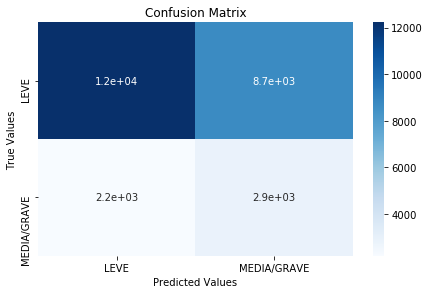

In [21]:
# matriz confusion
mat_conf = confusion_matrix(y_test, y_preds)

# dataframe auxiliar para grafica
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# crear heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## Random Forest

In [22]:
n_trees = 300
modelo_RF = RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, random_state=42, class_weight='balanced')

resultadosRF = cross_val_score(modelo_RF, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('Random Forest:\n')
print('Media:',resultadosRF.mean(),' Desviación:',resultadosRF.std())


Random Forest:

Media: 0.6870486311706202  Desviación: 0.009814743063626081


In [23]:

modelo_RF.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_RF.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report Random Forest: \n', report)


Classification Report Random Forest: 
               precision    recall  f1-score   support

        LEVE       0.85      0.58      0.69     20955
 MEDIA/GRAVE       0.25      0.57      0.35      5091

    accuracy                           0.57     26046
   macro avg       0.55      0.57      0.52     26046
weighted avg       0.73      0.57      0.62     26046



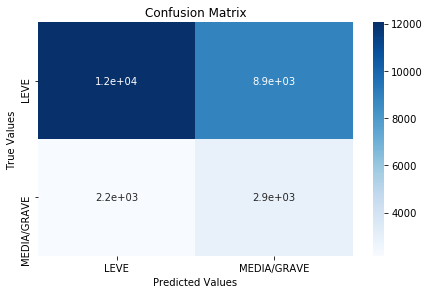

In [24]:
# matriz confusion
mat_conf = confusion_matrix(y_test, y_preds)

# dataframe auxiliar para grafica
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# creamos heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## GradientBoostingClassifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

num_trees = 300
modelo_GBC = GradientBoostingClassifier(n_estimators=num_trees, random_state=42)

resultadosGBC = cross_val_score(modelo_GBC, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)

print('GRADIENT BOOST CLASSIFIER:\n')
print('Media:',resultadosGBC.mean(),' Desviación:',resultadosGBC.std())



GRADIENT BOOST CLASSIFIER:

Media: 0.6947468779405193  Desviación: 0.007804408169586019


In [26]:

modelo_GBC.fit(X_train_rsmpl, y_train_rsmpl)

y_preds = modelo_GBC.predict(X_test)

report = classification_report(y_test, y_preds)
print('Classification Report GRADIENT BOOST CLASSIFIER: \n', report)


Classification Report GRADIENT BOOST CLASSIFIER: 
               precision    recall  f1-score   support

        LEVE       0.85      0.61      0.71     20955
 MEDIA/GRAVE       0.26      0.57      0.36      5091

    accuracy                           0.60     26046
   macro avg       0.56      0.59      0.54     26046
weighted avg       0.74      0.60      0.64     26046



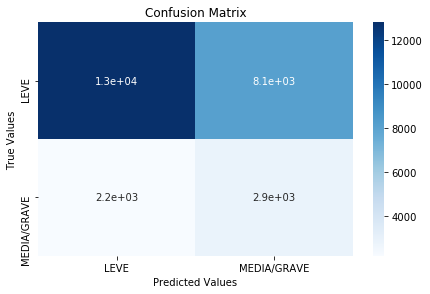

In [27]:
# matriz confusion
mat_conf = confusion_matrix(y_test, y_preds)

# dataframe auxiliar para grafica
dataframe = pd.DataFrame(mat_conf, index=['LEVE', 'MEDIA/GRAVE'], columns=['LEVE', 'MEDIA/GRAVE'])

# crear heatmap
sns.heatmap(dataframe, annot=True, cbar=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('Predicted Values'), plt.ylabel('True Values')
plt.show()

## PROBAR POSIBILIDAD DE REFINAR UNDERSAMPLING NEAR_MISS especificando tasa undersampling (sampling_strategy)

In [29]:
modelos = []

modelos.append(('RF',RandomForestClassifier(n_estimators=n_trees, n_jobs=-1, random_state=42, class_weight='balanced')))
modelos.append(('DECS_TREE', DecisionTreeClassifier(class_weight='balanced', random_state=42)))
modelos.append(('GRAD_BOOST_CLASS', GradientBoostingClassifier(n_estimators=num_trees, random_state=42)))

In [30]:
sampling_strategy = list(np.arange(0.3,1,0.1))
sampling_strategy

[0.3,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000002,
 0.8000000000000003,
 0.9000000000000001]

In [31]:
num_trees = 300

for ratio in sampling_strategy:
    
    nrmiss = NearMiss(sampling_strategy=ratio, n_jobs=-1)
    X_train_rsmpl, y_train_rsmpl = nrmiss.fit_sample(X_train, y_train)
    
    print('ESTRATEGIA:',ratio,'\n')
    
    for nombre, modelo in modelos:
                
        model = modelo
        
        resultados = cross_val_score(model, X_train_rsmpl, y_train_rsmpl, cv=skf, scoring=scoring)
        
        print(nombre,':\n')
        print('Media:',resultados.mean(),' Desviación:',resultados.std(),'\n')
        
    print('----------'*6,'\n')

    


ESTRATEGIA: 0.3 

RF :

Media: 0.6874539101974756  Desviación: 0.008164730559855905 

DECS_TREE :

Media: 0.6876384217323639  Desviación: 0.00807895190532495 

GRAD_BOOST_CLASS :

Media: 0.6925944648763503  Desviación: 0.007561100307926784 

------------------------------------------------------------ 

ESTRATEGIA: 0.4 

RF :

Media: 0.685003659726141  Desviación: 0.007770189424230646 

DECS_TREE :

Media: 0.6850725639673751  Desviación: 0.00736197037835551 

GRAD_BOOST_CLASS :

Media: 0.6921147041067834  Desviación: 0.008380209063560835 

------------------------------------------------------------ 

ESTRATEGIA: 0.5 

RF :

Media: 0.6858622673299025  Desviación: 0.005997908170522844 

DECS_TREE :

Media: 0.6857655185892535  Desviación: 0.00607715443114483 

GRAD_BOOST_CLASS :

Media: 0.6926366036425874  Desviación: 0.007023442224338792 

------------------------------------------------------------ 

ESTRATEGIA: 0.6000000000000001 

RF :

Media: 0.6849829237923376  Desviación: 0.010476

Los resultados no son mejores que los obtenidos antes.

**SE DESECHA LA TÉCNICA DE UNDERSAMPLING UTILIZADA POR OBTENER PEORES RESULTADOS QUE LOS OBTENIDOS APLICANDO OVERSAMPLING**